**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [1]:
from IPython.display import Video

Video("forest_fire.mp4")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [4]:
EMPTY, TREE, BURN = 0, 1, 2

In [5]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [75]:
def fire(x):
    result = np.zeros((n,n),dtype = int)
    for i in range(1,n):
        for j in range(1,n):
            if x[i,j] == 2 :
                result[i,j] = 0
            elif x[i,j] == 0 and np.random.uniform()<p:
                result[i,j] = 1
            elif x[i,j] == 1 and (x[i-1:i+2,j-1:j+2]>1).any():
                result[i,j] = 2
            elif x[i,j] == 1 and np.random.uniform()<f:
                result[i,j] = 2
            else:
                 result[i,j] = x[i,j]
    return result

In [76]:
# Your code to generate the `sim` array here.
%%time
sim = np.zeros((steps,n,n),dtype="int32")
for i in range(n-1):
    sim[i+1,:,:] = fire(sim[i,:,:])

CPU times: user 1min 20s, sys: 8 ms, total: 1min 20s
Wall time: 1min 20s


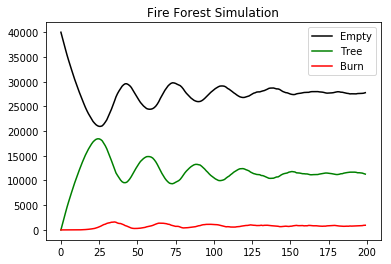

In [127]:
# Your code to make the first plot here
mask = sim != 0
empty = np.ma.masked_array(sim, mask).count(axis = (1,2))
mask = sim != 1
tree = np.ma.masked_array(sim, mask).count(axis = (1,2))
mask = sim != 2
burn = np.ma.masked_array(sim, mask).count(axis = (1,2))
x = range(200)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, empty, "black", label= 'Empty')
ax.plot(x, tree, "green", label= 'Tree')
ax.plot(x, burn, "red", label = "Burn")
plt.title('Fire Forest Simulation')
ax.legend()
plt.show()

In [187]:
sim2 = np.zeros((steps,n,n), dtype = int)
def fire2(i,j,data):
    if data[i,j] == 2:
        return 0
    elif data[i,j] == 0 and np.random.uniform()<p:
        return 1
    elif data[i,j] == 1 and (data[i-1:i+2,j-1:j+2]>1).any():
        return 2
    elif data[i,j] == 1 and np.random.uniform()<f:
        return 2
    else:
        return data[i,j]

In [156]:
%%time
for k in range(1,steps): 
    for i in range(n):
        for j in range(n):
            sim2[k,i,j] = fire2(i,j,sim2[k-1,:,:])

CPU times: user 46.4 s, sys: 0 ns, total: 46.4 s
Wall time: 46.3 s


In [236]:
sim3 = np.zeros((steps,n,n),dtype = int)
def fire3(i,j,data):
    if data[i,j] == 2:
        return 0
    elif data[i,j] == 0:# and np.random.uniform()<p:
        return 1
    elif data[i,j] == 1:# and (data[i-1:i+2,j-1:j+2]>1).any():
        return 2
    elif data[i,j] == 1:# and np.random.uniform()<f:
        return 2
    else:
        return data[i,j]

In [241]:
mask1 = sim[3,:,:] == 0 and np.random.uniform(size = (n,n)) <p
#m1 = np.ma.masked_array(sim[3,:,:],mask1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [253]:
(np.random.uniform(size = (n,n)) < p) & (sim[3,:,:].any() == 0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False,  True, False]])

In [240]:
?np.random.uniform()

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [201]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [202]:
%%time

HTML(ani.to_jshtml())

CPU times: user 26.1 s, sys: 25.6 s, total: 51.7 s
Wall time: 17.2 s


In [ ]:
for k in range(1,steps): 
    for i in range(n):
        for j in range(n):
            sim2[k,i,j] = fire2(i,j,sim2[k-1,:,:])

In [153]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```

In [136]:
type(sim[1,1,1])

numpy.int64